#**Case de Avaliação de modelos de machine lerning.**

##**Gustavo Pavanello Trevisan**

O data set utilizado nessa avaliação está disponível em [Star dataset to predict star types](https://www.kaggle.com/deepu1109/star-dataset)

In [189]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving Stars.csv to Stars (2).csv


In [190]:
import io

stars = pd.read_csv('Stars.csv', encoding = 'unicode_escape')

In [ ]:
stars.shape

(240, 7)

In [ ]:
type(stars)

pandas.core.frame.DataFrame

In [ ]:
stars.info

<bound method DataFrame.info of      Temperature (K)  Luminosity(L/Lo)  ...  Star color  Spectral Class
0               3068          0.002400  ...         Red               M
1               3042          0.000500  ...         Red               M
2               2600          0.000300  ...         Red               M
3               2800          0.000200  ...         Red               M
4               1939          0.000138  ...         Red               M
..               ...               ...  ...         ...             ...
235            38940     374830.000000  ...        Blue               O
236            30839     834042.000000  ...        Blue               O
237             8829     537493.000000  ...       White               A
238             9235     404940.000000  ...       White               A
239            37882     294903.000000  ...        Blue               O

[240 rows x 7 columns]>

In [ ]:
stars.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [ ]:
stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
print(stars.groupby("Star type").size())

Star type
0    40
1    40
2    40
3    40
4    40
5    40
dtype: int64


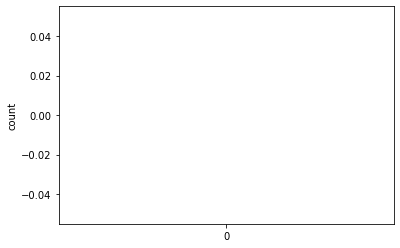

In [191]:
import seaborn as sns
human_readable_star_types = stars['Star type'].replace(
    {
      0: "Brown Dwarf",
      1: "Red Dwarf",
      2: "White Dwarf",
      3: "Main Sequence",
      4: "Supergiant",
      5: "Hypergiant"
    },
    inplace=True
  )
sns.countplot(human_readable_star_types, label="Count")

plt.show()

In [192]:
print(human_readable_star_types)

None


**O gráfico acimos nos mostra que nossos dados alvo tem uma distribuição simétrica, o que faz com que o método de avaliação através da acurácia dos modelos (que criaremos mais a frente) nos deem uma boa noção de sua eficácia.**

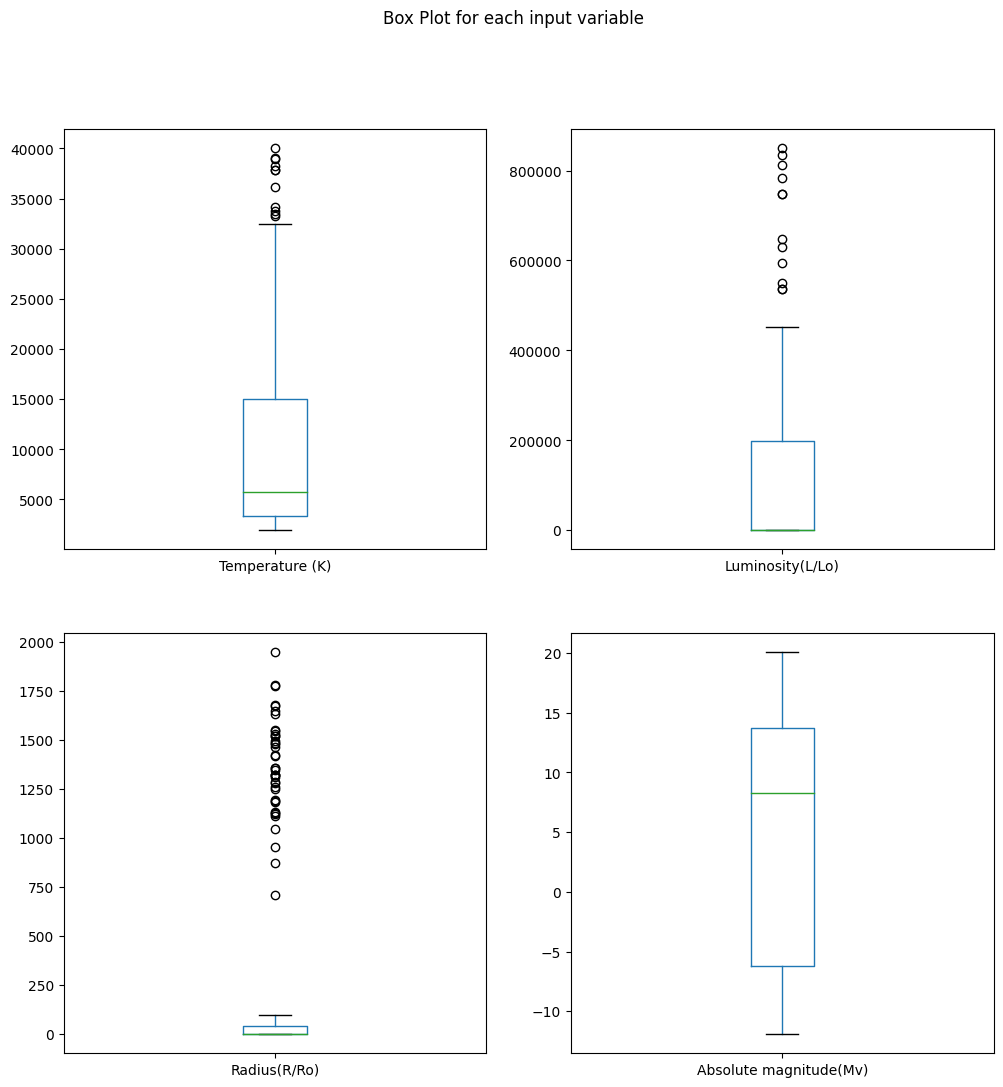

In [ ]:
stars.drop('Star type', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,12), 
                                        title='Box Plot for each input variable')
plt.savefig('Stars_box')
plt.show()

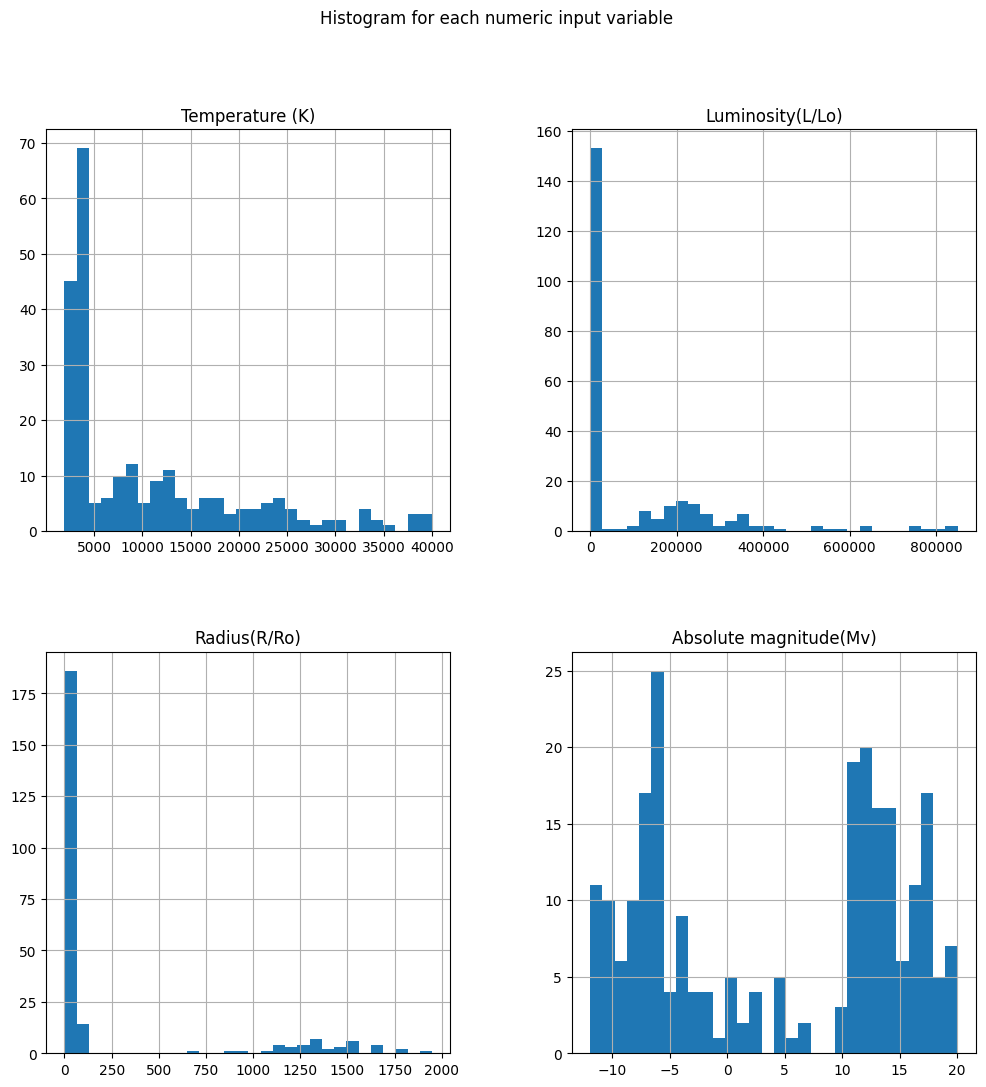

In [ ]:
import pylab as pl
stars.drop('Star type' ,axis=1).hist(bins=30, figsize=(12,12))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Stars_hist')
plt.show()

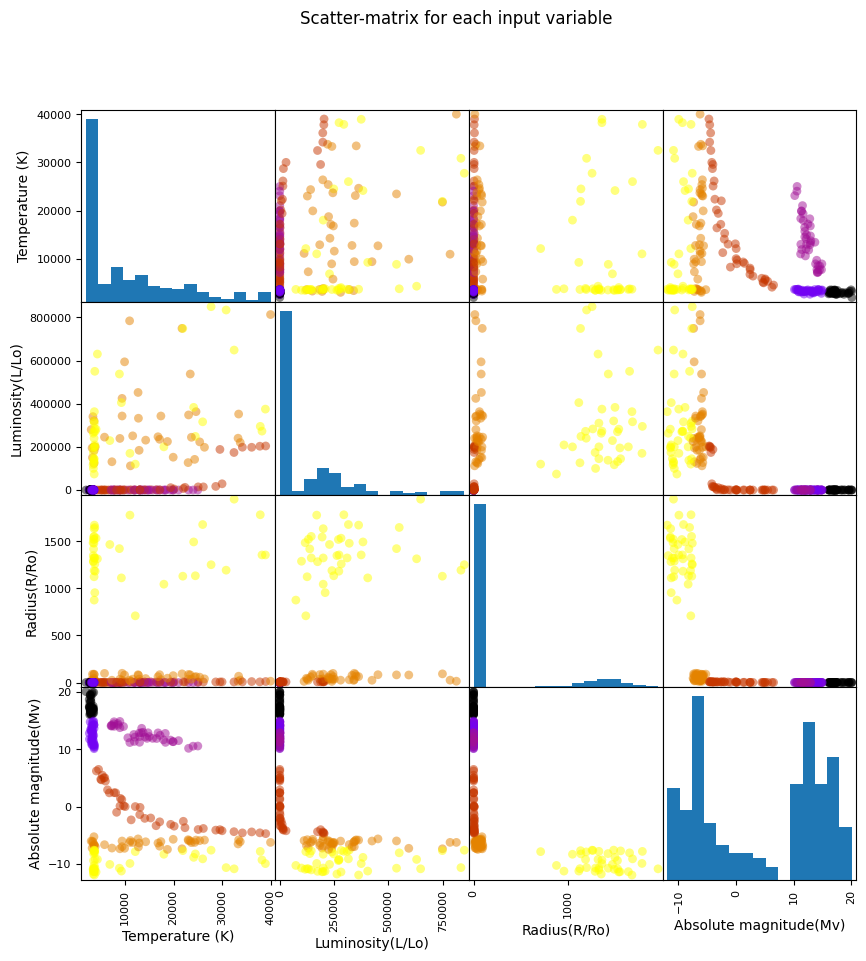

In [ ]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
X = stars[feature_names]
y = stars['Star type']
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('Stars_scatter_matrix')

In [ ]:
correlacao = stars.corr(method='pearson',min_periods=1)
correlacao.loc['Star type',:]


Temperature (K)           0.411129
Luminosity(L/Lo)          0.676845
Radius(R/Ro)              0.660975
Absolute magnitude(Mv)   -0.955276
Star type                 1.000000
Name: Star type, dtype: float64

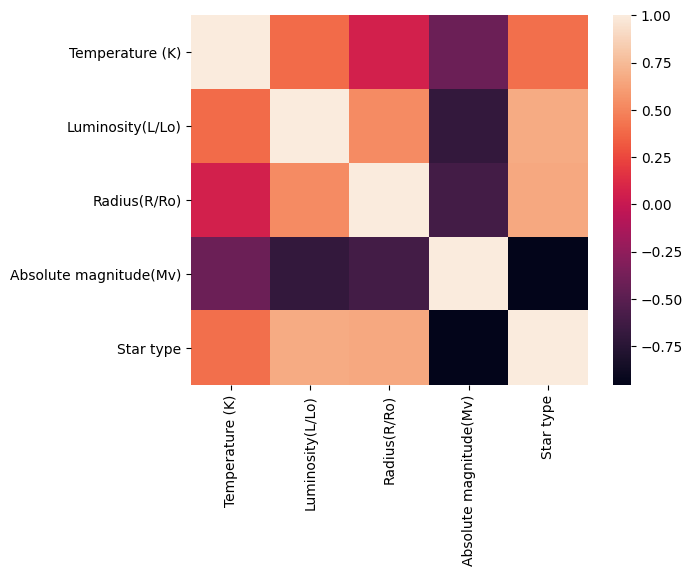

In [ ]:
sns.heatmap(correlacao)

### **A partir do gráfico de calor e dos números de correlação, podemos verificar que a variável de tipo de estrela tem uma alta correlação com a luminosidade e o raio da estrela**

In [ ]:
stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
# Create Training and Test Sets and Apply Scaling

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build Models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.78


In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99


In [ ]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.99


In [ ]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.98
Accuracy of LDA classifier on test set: 0.99


In [ ]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 0.97


In [ ]:
# Support Vector Machine

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.94


**Podemos perceber que o melhor modelo, baseado na acurácia, teve uma precisão de 100% nos treino e de 99% nos testes. O modelo do algoritmo de árvore de decisão foi o que melhor se saiu na avaliação de acurácia.** 


---


**Entretanto, devemos realizar outros testes para ter total certeza se nosso modelo está totalmente correto.
Esses testes medem as seguintes métricas de classificação:**

1.   **Accurancy (já medido)**
2.   **Recall**
1.   **Precision**
2.  **F1-Score**









**Também podemos notar, a partir do relatório de classificação, que todos os parâmetros classificatórios do algoritmo estão em 100%.**

**Contudo, os testes ainda são de pequenas proporções.**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



In [ ]:
print(confusion_matrix(y_test,predictions))

[[10  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  0 15  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 12]]


**Percebemos que o algorítmo de árvore de decisão apresenta uma ótima acurácia. 
A matrix de confusão nos mostrou que apenas um erro foi cometido no teste.**



**Também podemos notar, a partir do relatório de classificação, que os parâmetros classificatórios do algoritmo estão muito próximos de 100%**

**Contudo, os testes ainda são de pequenas proporções. Para melhor avaliação da eficiência desse modelo iremos montar uma visualização da árvore de decisão.**

In [ ]:
#visualização da árvore de decisão
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(stars.columns[1:5])
features


['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']

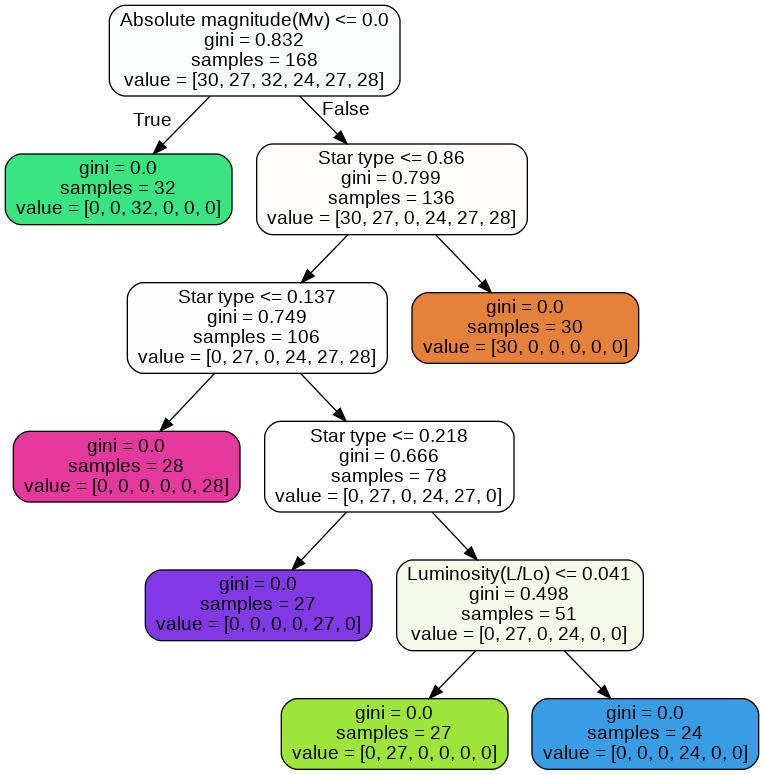

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

**Agora iremos comparar nossa Árvore de decisão com o modelo de Random Forest.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[10  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  0 15  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 12]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



**Podemos perceber que ambas chegam em uma eficiência muito parecida, dmontrando uma acurácia, precisão, recall e F1 de 99%**